# Aim: To predict the prices of stainless-steel (Column B: StainlessSteelPrice) 
Tasks:
1. Conduct exploratory data analysis and report the insights
Answer:Exploratory Data Analysis has been done. Following steps performed for this purpose
#1. Missing Values if any 
#2. Distribution of the Numerical Variables
#3. Relationship between independent and dependent feature(StainlessSteelPrice)
#4. Relationship in between independent features
#5. Removed high correlated independent features
#6. Analysed and displayed the trend, seasonality etc.

2. Forecast the prices of stainless-steel for the given time period(s) using the
following methods
1. Statistical Models (at least one type):
Answer: Following methods has been used:
#1. Prophet Statistical method
#2. SARIMA

2. Machine Learning (at least one type)
Answer: Linear Regresion, LASSO, Ridge Regression, Gradient Boosting Method(xgboost), Neural Network, 

3.Deep Learning (at least one type)
Answer: LSTM and deep neural network have been used for this purpose

Select the features - Column C (Steel_Inventory_M_USD) through column
T (Copper_Global_USD) – that help to improve the accuracy
Answer: I have used some features for price forcasting

3. Provide insights on how your model made the prediction
Answer:
There are two ways to learn the time searies data:
1. Use the time or date with other independent fearture. For this purpose the previous prices as well as independent features have been taken into account to learn this time series data. Here I have used the prophet, SARIMA, LSTM approaches to forcast the stainless steel prices.
2. Take into account the time or  effect as a new variable and build the machine learning model( Here I have created a new variable number of days from today to that date, it can be taken as future date as well to take  the effect of future as well). Neural Network, Gradient boosting and Random forest approach have been used to learn these data. 

4. Use the following evaluation criteria for model selection
Mean Absolute Percentage Error (MAPE)
Directional Symmetry
Answer: Both methods have been implemented an have been used to evaluate the models

Conclusion (Summary):
Among all models prophet model is perfoming best with Mean Absolute Percentage Error(MAPE) 4.25. Crossvalidation has been used to evaluate this model. For each year 2 data points has been used to test the model with total 13 independent features.

Libraries used: Pytoech, SKlearn, Keras, AutoFeat, Facebook Prophet

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import  train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error
from scipy.stats import skew
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
import torch
import torch.nn as nn
from pandas import DataFrame
import itertools
import os
import sys
import warnings
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from autofeat import AutoFeatRegressor
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
%matplotlib inline
%load_ext autoreload
%autoreload 2
register_matplotlib_converters()
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/sureshkuc/chemovator./main/Stainless-Steel-Prices-Forecasty-Assignment.csv')



In [3]:
data

,Date,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
0,7/1/2013,0.827352,20575,10568,127.191304,82.222360,227.022942,13750.31522,1837.619565,-0.4,104.545217,1062,98.80018,99.64265,100.10440,101.14230,99.43615,100.62300,50.9,6906.64
1,8/1/2013,0.760221,20609,10821,137.055000,82.221429,232.234194,14308.26190,1896.392857,0.5,106.546364,1132,99.04874,99.91766,100.39620,101.19380,99.64082,100.65450,55.4,7186.25
2,9/1/2013,0.784715,20761,10774,134.185714,83.295918,234.335594,13801.39286,1846.880952,0.1,106.313809,2003,99.27196,100.18490,100.53630,101.20660,99.84383,100.66460,55.7,7159.27
3,10/1/2013,0.769293,20735,11291,132.572727,85.443634,229.393932,14117.65217,1884.836957,-0.1,100.500435,1504,99.40488,100.36330,100.57710,101.18350,100.02300,100.66660,56.2,7203.02
4,11/1/2013,0.750242,20854,11559,136.323810,88.363265,225.437049,13684.01190,1866.416667,2.1,93.812381,1821,99.36221,100.49830,100.54590,101.12830,100.17150,100.67440,56.4,7070.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2/1/2020,0.893123,19753,9914,87.625000,71.050179,110.312331,12715.55000,2113.237500,-0.6,50.601500,535,94.50153,99.15099,98.99674,85.38329,99.33393,99.23477,50.9,5687.75
80,3/1/2020,0.829167,19945,9072,88.659091,70.204870,73.684533,11846.22727,1903.625000,-0.6,29.877273,626,96.55129,97.81904,98.56776,92.34856,96.87456,97.54372,50.1,5182.63
81,4/1/2020,0.789704,19824,7800,83.750000,64.620000,52.771306,11804.00950,1903.367000,-7.1,16.807273,635,98.21212,96.24888,98.10213,95.14948,90.34396,92.28025,49.1,5057.97
82,5/1/2020,0.762035,19441,8908,91.333333,54.148308,66.915249,12179.60526,1975.322632,1.0,28.794762,504,99.01438,95.99664,98.35104,97.71723,93.02601,93.95093,41.5,5239.83


In [4]:
data.describe()

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.810715,20070.559524,9831.595238,79.962940,81.844151,143.408951,12712.275477,2358.786301,0.122619,61.017507,1067.785714,98.710869,100.569427,100.175521,99.563679,100.023602,99.814380,54.026190,6037.075714
std,0.143444,1764.033210,1240.333905,23.874776,19.443360,47.136073,2694.729168,470.463900,1.230080,21.407539,443.697935,0.848983,1.123901,0.876723,2.027340,1.567463,1.367807,4.097578,783.645475
min,0.499859,16688.000000,7650.000000,40.882609,53.428929,52.771306,8298.500000,1520.362500,-7.100000,16.807273,317.000000,94.501530,95.996640,98.102130,85.383290,90.343960,92.280250,41.500000,4471.790000
25%,0.743778,18980.000000,8904.000000,61.484190,67.111352,111.607197,10578.975000,2021.262099,-0.425000,47.738636,699.500000,98.271312,100.427200,99.535878,99.225065,99.696710,99.278723,51.275000,5645.152500
50%,0.812157,20190.000000,9947.000000,74.280682,78.677679,131.088857,12721.351135,2287.054725,0.250000,54.912545,1058.500000,98.675055,100.562400,100.312350,99.854750,100.294100,100.030800,54.250000,6024.555000
75%,0.893690,21458.500000,11062.500000,92.409524,96.985695,163.923895,14105.350543,2658.296875,0.725000,68.464674,1354.500000,99.364373,101.040100,100.803675,100.518350,100.500175,100.679550,57.400000,6801.285000
max,1.075014,23464.000000,11825.000000,137.055000,125.085877,237.208789,19401.075000,3532.900000,2.100000,106.546364,2378.000000,99.923670,102.323700,101.573800,101.206600,101.709300,100.968000,60.800000,7291.470000


In [5]:
#Exploratory Data Analysis:
#In Data Analysis We will Analyze To Find out the below stuff
#1. Missing Values if any 
#2. Distribution of the Numerical Variables
#3. Relationship between independent and dependent feature(StainlessSteelPrice)
#4. Relationship in between independent features


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      84 non-null     object 
 1   StainlessSteelPrice       84 non-null     float64
 2   Steel_Inventory_M_USD     84 non-null     int64  
 3   Steel_Orders_M_USD        84 non-null     int64  
 4   IronOre_Global_USD        84 non-null     float64
 5   CoalAustralia_Global_USD  84 non-null     float64
 6   Energy_Index              84 non-null     float64
 7   Nickel_Global_USD         84 non-null     float64
 8   Zinc_Global_USD           84 non-null     float64
 9   Freight_Transport_Index   84 non-null     float64
 10  WTI_Crude_Global_USD      84 non-null     float64
 11  Baltic_Dry_Index          84 non-null     int64  
 12  BCI_China                 84 non-null     float64
 13  BCI_Europe                84 non-null     float64
 14  BCI_US      

# Lets take a look at how the StainlessSteel Price is distributed

count    84.000000
mean      0.810715
std       0.143444
min       0.499859
25%       0.743778
50%       0.812157
75%       0.893690
max       1.075014
Name: StainlessSteelPrice, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



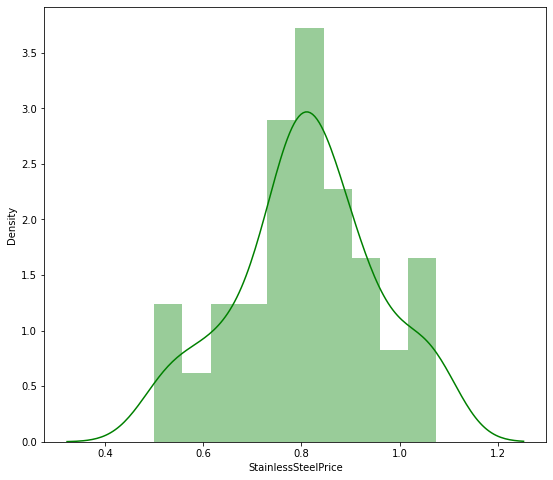

In [8]:
print(data['StainlessSteelPrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['StainlessSteelPrice'], color='g', bins=10, hist_kws={'alpha': 0.4})

# New Variable Creation for date to take into account the time component into model( machine Learning models) 

In [9]:
from datetime import date
data['dd'],data['mm'],data['yyyy']=data['Date'].str.split("/", expand=True)[0],data['Date'].str.split("/", expand=True)[1],data['Date'].str.split("/", expand=True)[2]
today = date.today()
number_of_days=[]
dates=[]
for yy, mm, dd in zip(data['yyyy'],data['mm'],data['dd']):
  d1 = date(int(yy),int(mm),int(dd))
  dates.append(d1)
  delta = today - d1
  number_of_days.append(delta.days)
data['Date']=dates

# Distribution of Independent Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6b9adf518>,
      dtype=object)

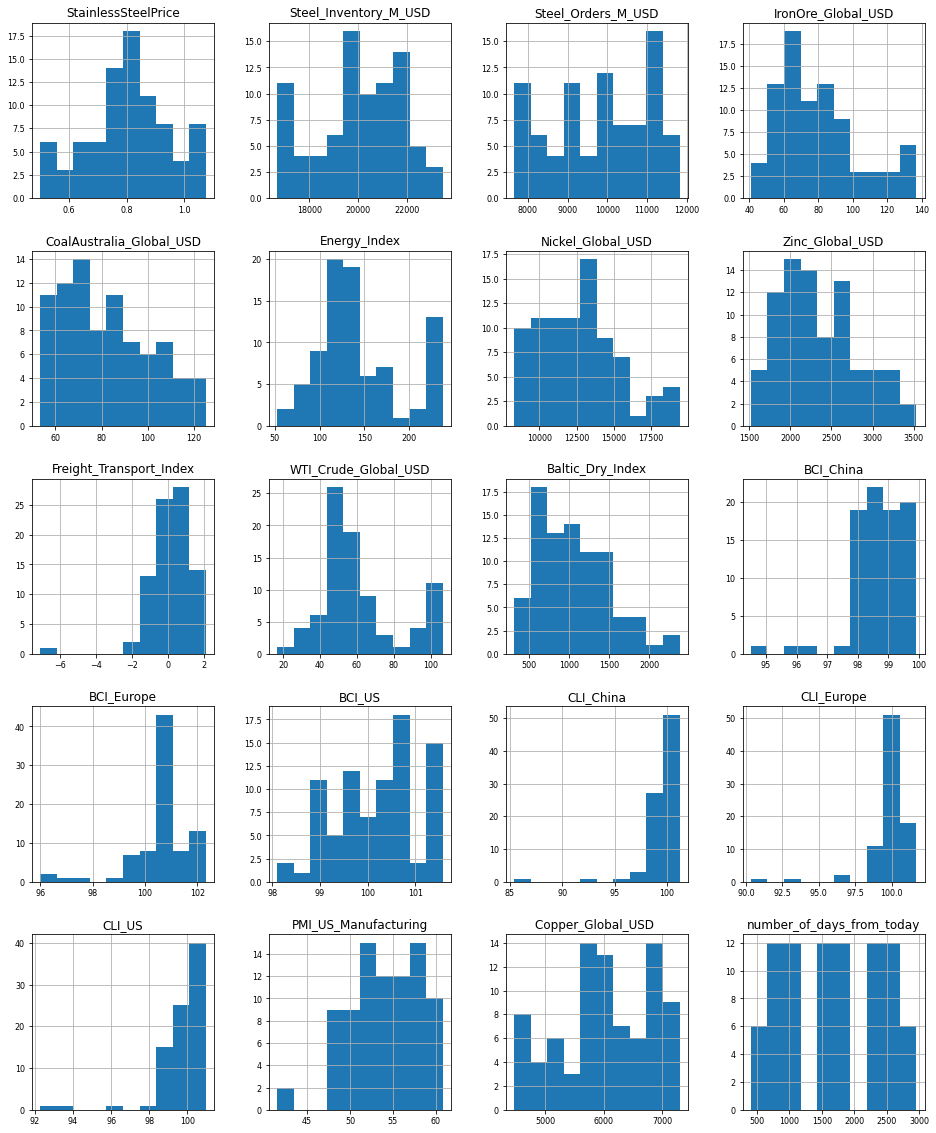

In [10]:
data['number_of_days_from_today']=number_of_days
data.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)

# Correlation
#Now we'll try to find which features are strongly correlated. Featurres which has correlation 0.9 we will store them and will remove later bofore the model building process. We found 4 fearture which has more than 0.5 correlation with StainlessSteel Price dependent variable, which are as follows: 1.Steel_Inventory_M_USD 2. Steel_Orders_M_USD 3. Copper_Global_USD 5. Nickel_Global_USD

In [13]:
correlatedcolumns=list()
for i in [col for col in data.columns if col not in ['Date','dd','mm','yyyy','StainlessSteelPrice']]:
  df_num_corr = data.corr()[i][1:] # 1 because the first row is StainlessSteelPrice
  removable_features_list = df_num_corr[abs(df_num_corr) > 0.9  ].sort_values(ascending=False)
  for key, value in dict(removable_features_list).items():
    if key != i:
      correlatedcolumns.append(key)
  print("There is {} strongly correlated values with {}:\n{}".format(len(removable_features_list), i, removable_features_list))
columns_need_to_remove=list(set(correlatedcolumns))

There is 1 strongly correlated values with Steel_Inventory_M_USD:
Steel_Inventory_M_USD    1.0
Name: Steel_Inventory_M_USD, dtype: float64
There is 1 strongly correlated values with Steel_Orders_M_USD:
Steel_Orders_M_USD    1.0
Name: Steel_Orders_M_USD, dtype: float64
There is 1 strongly correlated values with IronOre_Global_USD:
IronOre_Global_USD    1.0
Name: IronOre_Global_USD, dtype: float64
There is 1 strongly correlated values with CoalAustralia_Global_USD:
CoalAustralia_Global_USD    1.0
Name: CoalAustralia_Global_USD, dtype: float64
There is 2 strongly correlated values with Energy_Index:
Energy_Index            1.000000
WTI_Crude_Global_USD    0.988651
Name: Energy_Index, dtype: float64
There is 1 strongly correlated values with Nickel_Global_USD:
Nickel_Global_USD    1.0
Name: Nickel_Global_USD, dtype: float64
There is 1 strongly correlated values with Zinc_Global_USD:
Zinc_Global_USD    1.0
Name: Zinc_Global_USD, dtype: float64
There is 1 strongly correlated values with Frei

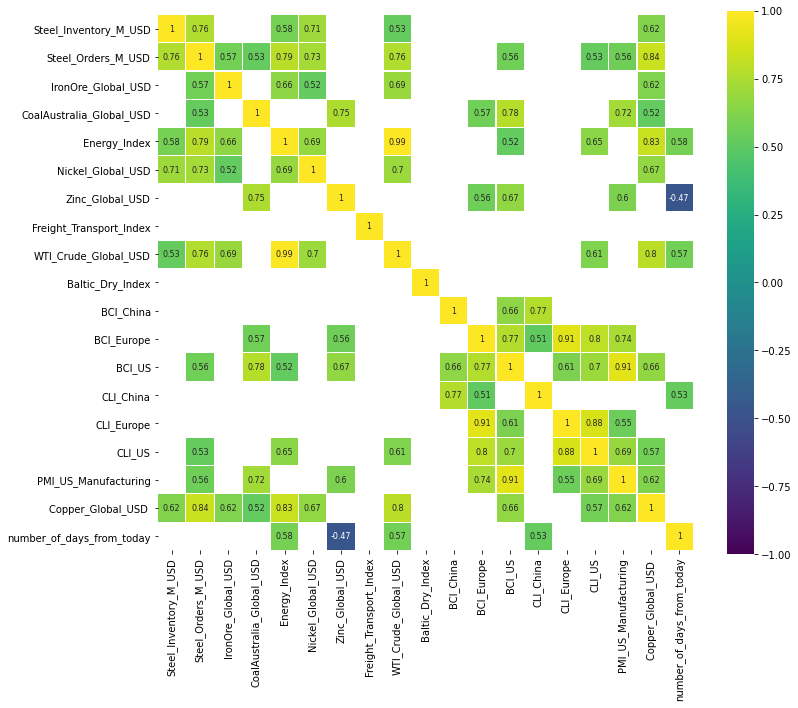

In [16]:
#heatmap
corr = data.drop('StainlessSteelPrice', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [14]:
#we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

#Plot the numerical features and see which ones have very few or explainable outliers
#Remove the outliers from these features and see which one can have a good correlation without their outliers
#Btw, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the StainlessSteelPrice.

#For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

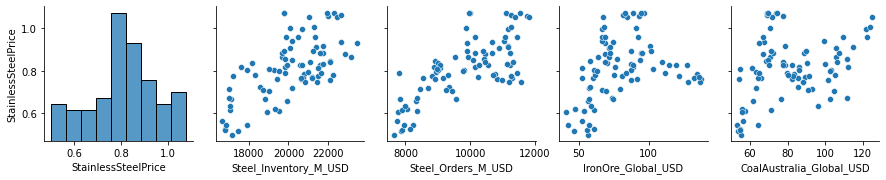

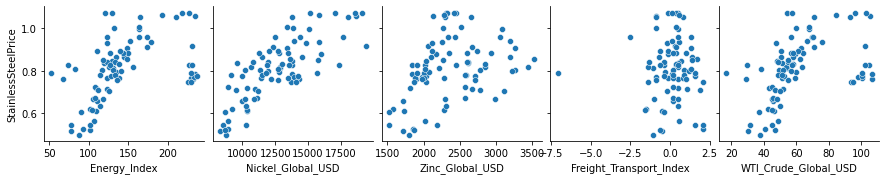

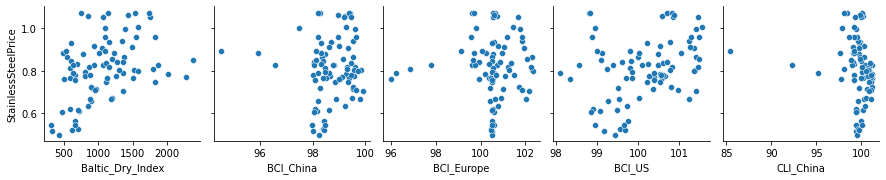

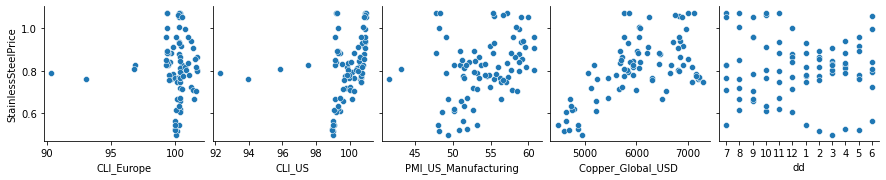

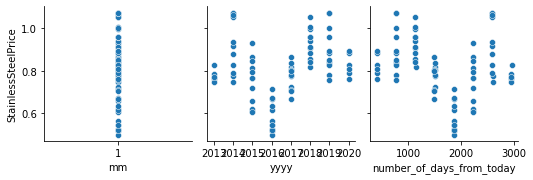

In [15]:
for i in range(1, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['StainlessSteelPrice'])

# Price vs Year plot

Text(0.5, 1.0, 'Price vs Year')

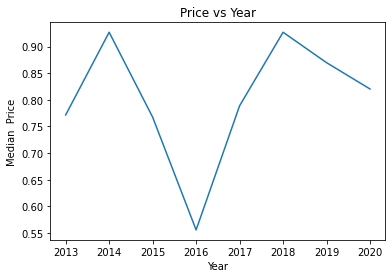

In [17]:
data.groupby(['yyyy'])['StainlessSteelPrice'].median().plot()
plt.xlabel('Year')
plt.ylabel('Median  Price')
plt.title("Price vs Year")

In [18]:
every_column_except_y= [col for col in data.columns if col not in ['Date','dd','mm','yyyy','StainlessSteelPrice']+columns_need_to_remove]

# Evaluation Metric

In [19]:
#Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#Directional Symmetry Statistic
def directional_symmetry(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return (1/(len(y_true)-1))*100*np.sum(np.where((y_true[1:]-y_true[:-1])*(y_pred[1:]-y_pred[:-1])>0,1,0))


# Statistical Model1: Prophet model

In [21]:
df_tmp=data.copy()
# split into train and test
# Split the data into X & y
X = df_tmp.drop(columns=['dd','mm','yyyy']+columns_need_to_remove,axis=1)
data_train=X
data_train.rename(columns={"Date": "ds", "StainlessSteelPrice": "y"}, inplace=True)
#data_test.rename(columns={"Date": "ds", "StainlessSteelPrice": "y"}, inplace=True)
#y_pred = m.predict(data_test)
#y_pred
#y_hat=np.array(y_pred[ ['yhat']]).reshape(2)
#print("MAPE on test data:", mean_absolute_percentage_error(data_test['y'], y_hat))
#print("Directional Symmetry Statistic on test data:", directional_symmetry(data_test['y'], y_hat))

In [22]:

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mape = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params) # Fit model with given params
    m = Prophet()
    for i in data_train.columns:
      if i not in ['ds','y']:
        m.add_regressor(i)
    m.fit(data_train)
    #df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', )
    cutoffs = pd.to_datetime(['2013-01-10', '2014-01-09', '2015-01-09','2016-01-09','2017-01-09','2018-01-09','2019-01-09'])
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='2 days',parallel="processes")
    #df_p = performance_metrics(df_cv)
    df_p = performance_metrics(df_cv, rolling_window=1)
    mape.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mape
print(tuning_results)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff6aebcccf8>
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff6aebcc128>
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO

    changepoint_prior_scale  seasonality_prior_scale      mape
0                     0.001                     0.01  4.248742
1                     0.001                     0.10  4.248742
2                     0.001                     1.00  4.248742
3                     0.001                    10.00  4.248742
4                     0.010                     0.01  4.248742
5                     0.010                     0.10  4.248742
6                     0.010                     1.00  4.248742
7                     0.010                    10.00  4.248742
8                     0.100                     0.01  4.248742
9                     0.100                     0.10  4.248742
10                    0.100                     1.00  4.248742
11                    0.100                    10.00  4.248742
12                    0.500                     0.01  4.248742
13                    0.500                     0.10  4.248742
14                    0.500                     1.00  4

In [23]:
tuning_results['mape'] = mape
print(tuning_results)
best_params = all_params[np.argmin(mape)]
print(best_params)

    changepoint_prior_scale  seasonality_prior_scale      mape
0                     0.001                     0.01  4.248742
1                     0.001                     0.10  4.248742
2                     0.001                     1.00  4.248742
3                     0.001                    10.00  4.248742
4                     0.010                     0.01  4.248742
5                     0.010                     0.10  4.248742
6                     0.010                     1.00  4.248742
7                     0.010                    10.00  4.248742
8                     0.100                     0.01  4.248742
9                     0.100                     0.10  4.248742
10                    0.100                     1.00  4.248742
11                    0.100                    10.00  4.248742
12                    0.500                     0.01  4.248742
13                    0.500                     0.10  4.248742
14                    0.500                     1.00  4

In [24]:

m = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=0.01)
for i in data_train.columns:
  if i not in ['ds','y']:
    m.add_regressor(i)
m.fit(data_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


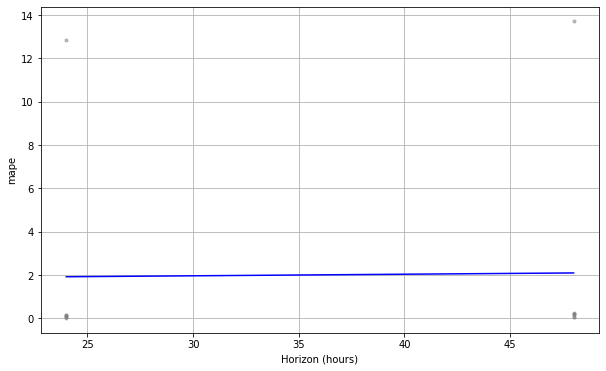

In [25]:

cutoffs = pd.to_datetime(['2013-01-10', '2014-01-09', '2015-01-09','2016-01-09','2017-01-09','2018-01-09','2019-01-09'])
df_cv = cross_validation(m, cutoffs=cutoffs, horizon='2 days')
df_p = performance_metrics(df_cv)
df_p.head()
fig = plot_cross_validation_metric(df_cv, metric='mape')


MAPE Mean Absolute Percentage Error: 5.173354120322739
Directional Symmetry Statistic: 60.24096385542169


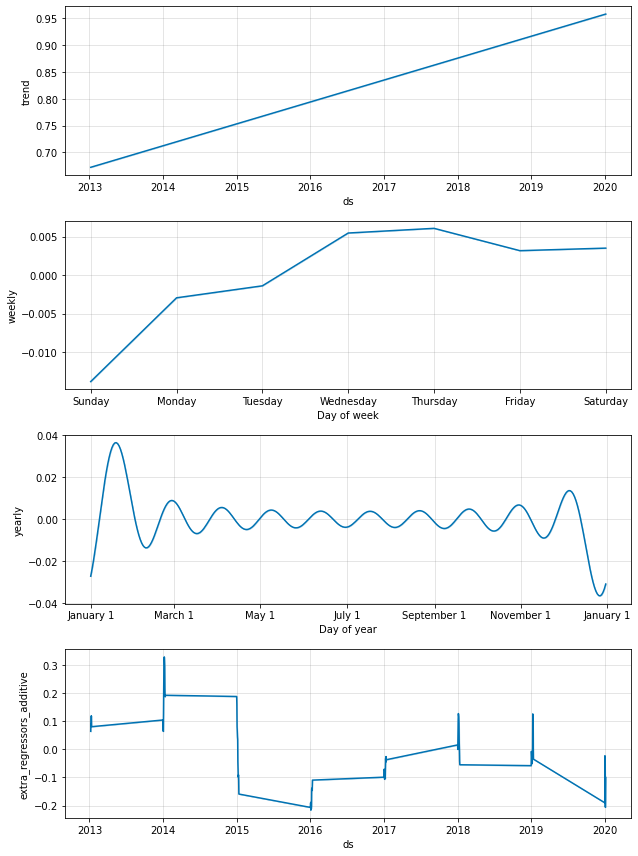

In [26]:
y_pred = m.predict(data_train)
print("MAPE Mean Absolute Percentage Error:", mean_absolute_percentage_error(data_train['y'], np.array(y_pred[['yhat']]).reshape(y_pred[['yhat']].shape[0])))
print("Directional Symmetry Statistic:", directional_symmetry(data_train['y'], np.array(y_pred[['yhat']]).reshape(y_pred[['yhat']].shape[0])))
fig2 = m.plot_components(y_pred)

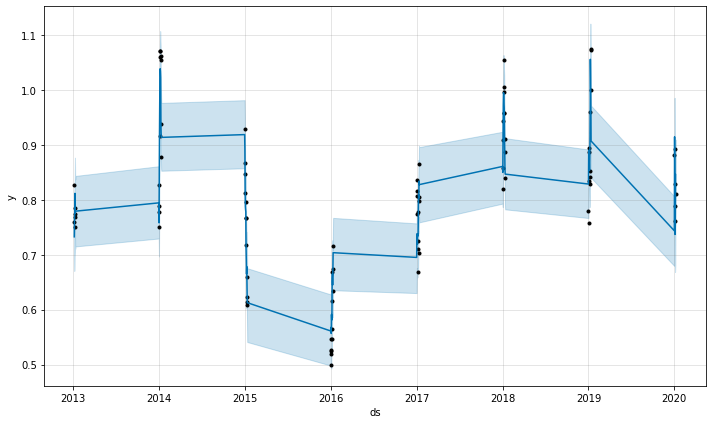

In [27]:
fig_test = m.plot(y_pred)

In [28]:
m = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=0.01)
m.fit(data_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


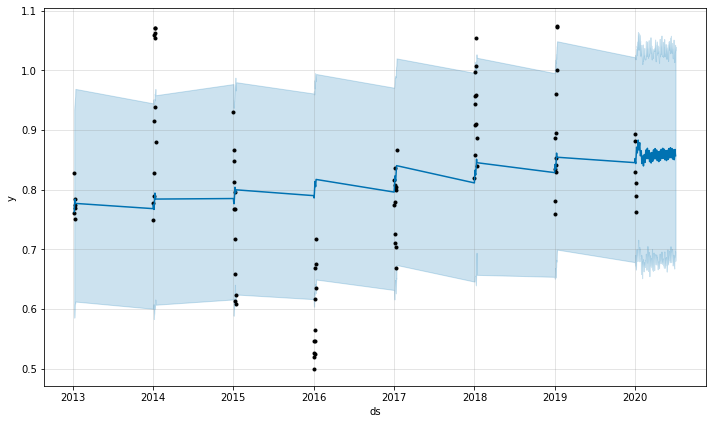

In [29]:
#next 6 month predictioins
future = m.make_future_dataframe(periods=180)
y_pred = m.predict(future)
fig_test = m.plot(y_pred)

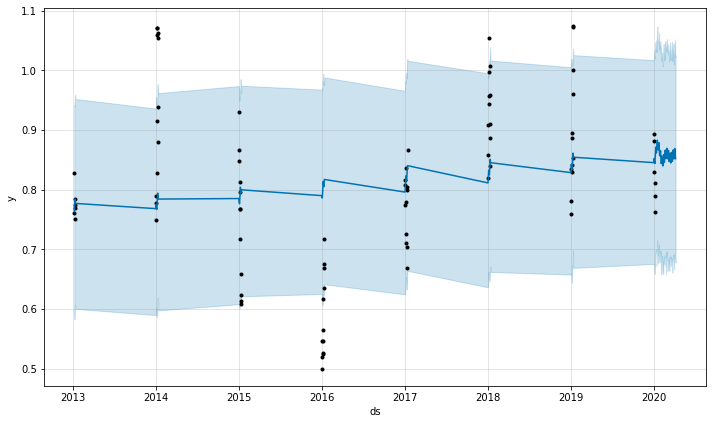

In [30]:
#next 3 month predictioins
future = m.make_future_dataframe(periods=90)
y_pred = m.predict(future)
fig_test = m.plot(y_pred)

# Statistical Model2: SARIMA

In [31]:
split_date = date(2020,1,1)
split_date = pd.to_datetime(split_date,format='%Y-%m-%d',utc=True)
#X['Date']= pd.to_datetime(X['Date'],format='%Y-%m-%d')
data_train = X.loc[X['ds'] <= split_date].copy()
data_test = X.loc[X['ds'] > split_date].copy()

In [32]:
#setting 'date' column as index columna as forecasting will be done for this column
#making 'TT' as float for statistical calculations
train_df =data_train
train_df = train_df.set_index('ds')
train_df['y'] = train_df['y'].astype(float)

train_df.head()

,y,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,Baltic_Dry_Index,BCI_China,CLI_China,CLI_US,Copper_Global_USD,number_of_days_from_today
ds,,,,,,,,,,,,,,
2013-01-07,0.827352,20575,10568,127.191304,82.222360,13750.31522,1837.619565,-0.4,1062,98.80018,101.1423,100.6230,6906.64,2960
2013-01-08,0.760221,20609,10821,137.055000,82.221429,14308.26190,1896.392857,0.5,1132,99.04874,101.1938,100.6545,7186.25,2959
2013-01-09,0.784715,20761,10774,134.185714,83.295918,13801.39286,1846.880952,0.1,2003,99.27196,101.2066,100.6646,7159.27,2958
2013-01-10,0.769293,20735,11291,132.572727,85.443634,14117.65217,1884.836957,-0.1,1504,99.40488,101.1835,100.6666,7203.02,2957
2013-01-11,0.750242,20854,11559,136.323810,88.363265,13684.01190,1866.416667,2.1,1821,99.36221,101.1283,100.6744,7070.65,2956


<Figure size 432x288 with 0 Axes>

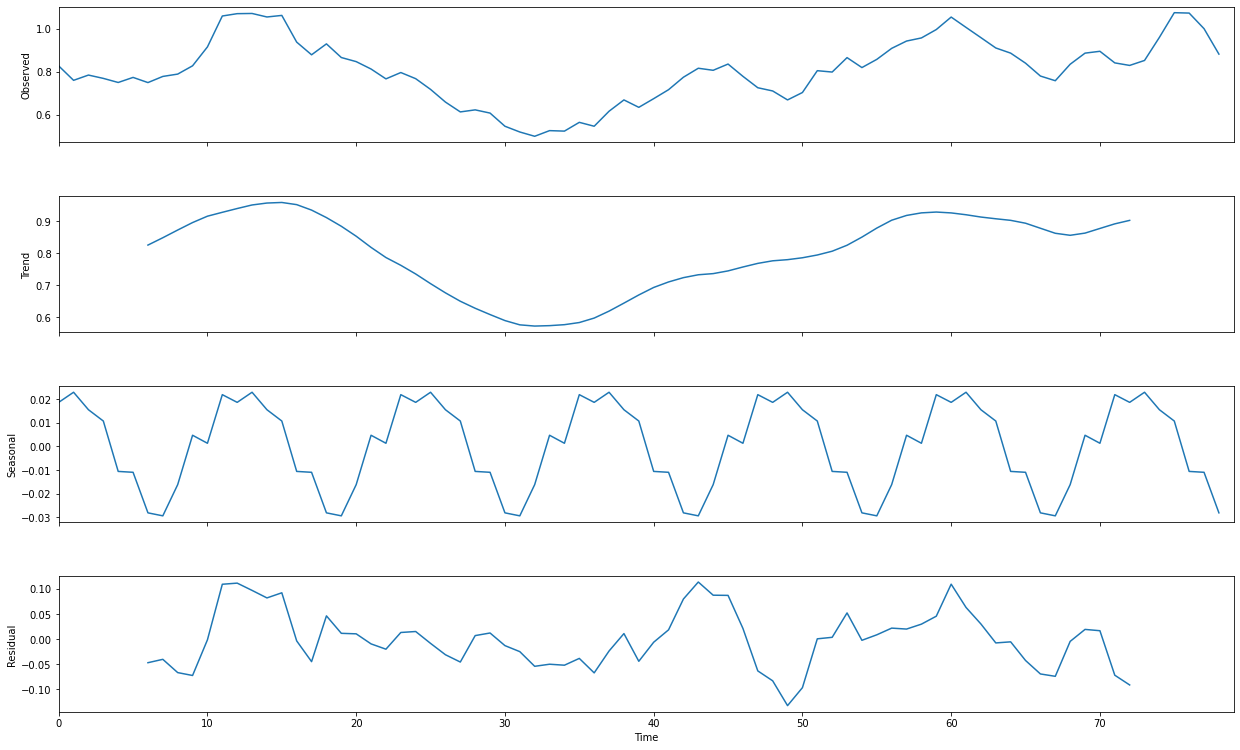

In [33]:
#Decomposing data to observe if there exists a sesional trend


result = seasonal_decompose(train_df['y'].values, model='additive',freq=12)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(20, 12)


In [34]:
 #adfuller stands for Augmented Dickey-Fuller unit root test.

#The function find mean and standard deviation of the series and and performs augmented dickey fuller test.
#returns pvale .. The samaller the pvalue more stationary is the series.

def test_stationarity(timeseries, window = 15, cutoff = 0.01):
  rolmean = timeseries.rolling(window).mean()
  rolstd = timeseries.rolling(window).std()
  fig = plt.figure(figsize=(12, 8))
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC',)
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  pvalue = dftest[1]
  if pvalue < cutoff:
      print('p-value = %.4f. The series is likely stationary.' % pvalue)
  else:
      print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
  
  print(dfoutput)

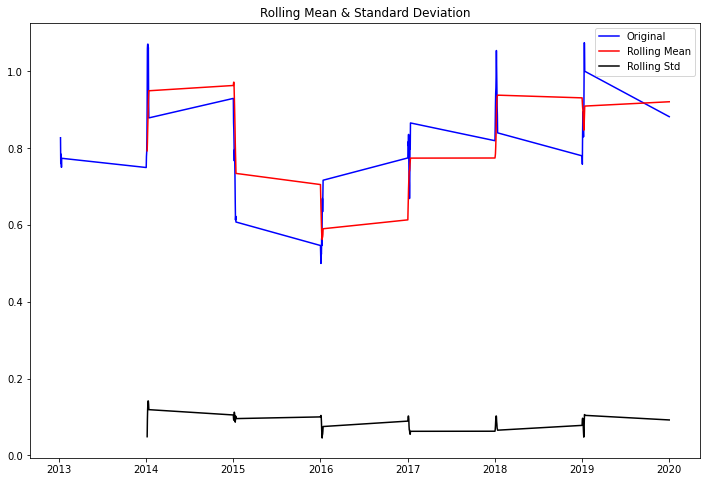

Results of Dickey-Fuller Test:
p-value = 0.1582. The series is likely non-stationary.
Test Statistic                 -2.343850
p-value                         0.158215
#Lags Used                      1.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


In [35]:
test_stationarity(train_df['y'],window = 11)
#calling the function gives below result , where we can observe the huge gap between orignal data and mean,std
#also the pvalue is 0.178976 which is not so good and hence , the output says "The series is likely non-stationary."

In [36]:
import statsmodels.api as sm
def acf_pacf(train_df):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(train_df.y, ax=ax1, ) # using default value of lag
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(train_df.y, ax=ax2) # using default value of lag

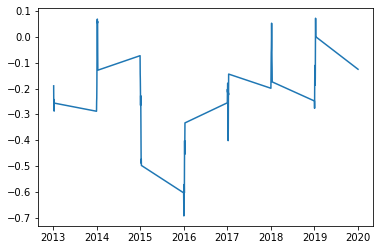

In [37]:
df_log = np.log(train_df.y )
plt.plot(df_log)

In [38]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)

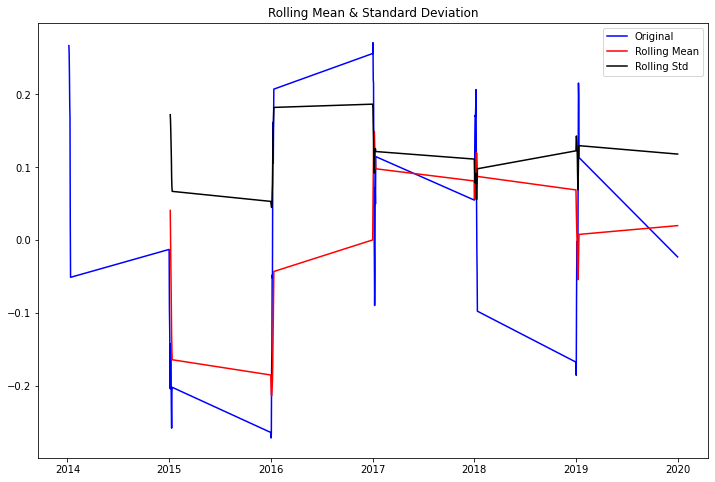

Results of Dickey-Fuller Test:
p-value = 0.0670. The series is likely non-stationary.
Test Statistic                 -2.742101
p-value                         0.067032
#Lags Used                      1.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


In [39]:
test_stationarity(df_log_minus_mean, window = 12)

In [40]:
df_log_minus_mean = pd.DataFrame({'ds':df_log_minus_mean.index, 'y':df_log_minus_mean.values})


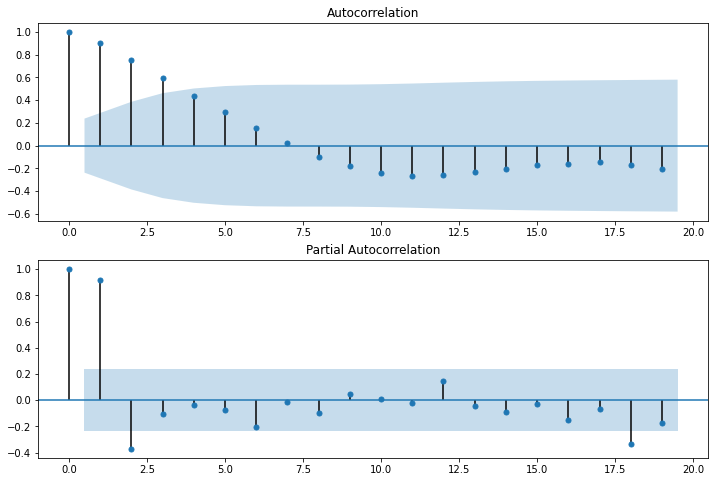

In [41]:
acf_pacf(df_log_minus_mean)

In [42]:
sarimax_mod = sm.tsa.statespace.SARIMAX(train_df.y, order=(11, 1, 0), seasonal_order=(0, 0, 0, 0), trend='ct').fit()
print(sarimax_mod.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   79
Model:              SARIMAX(11, 1, 0)   Log Likelihood                 128.031
Date:                Sun, 14 Feb 2021   AIC                           -228.061
Time:                        02:28:30   BIC                           -195.067
Sample:                             0   HQIC                          -214.853
                                 - 79                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0146      0.014     -1.011      0.312      -0.043       0.014
drift          0.0003      0.000      1.029      0.304      -0.000       0.001
ar.L1          0.3044      0.150      2.029      0.0

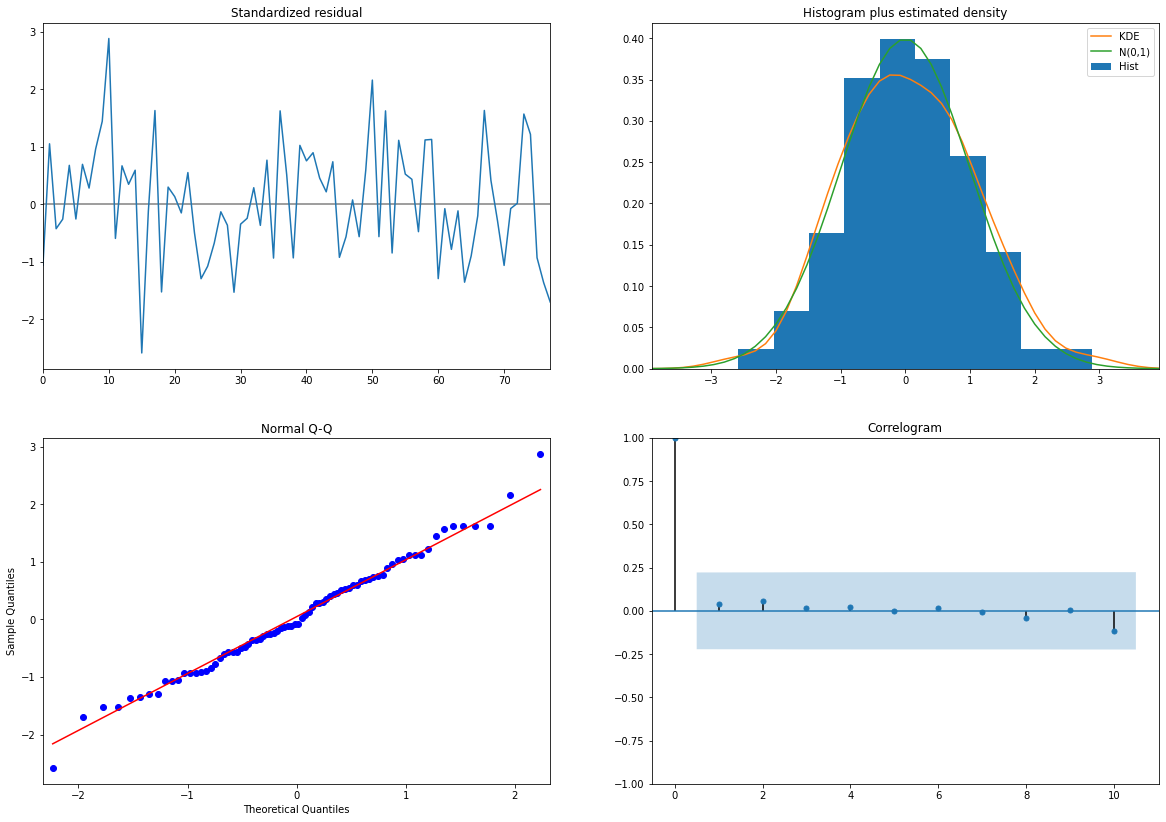

In [43]:
sarimax_mod.plot_diagnostics(figsize=(20, 14))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



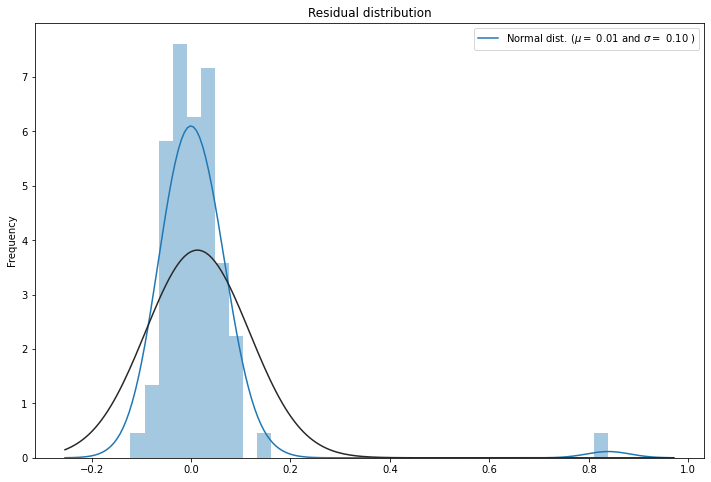

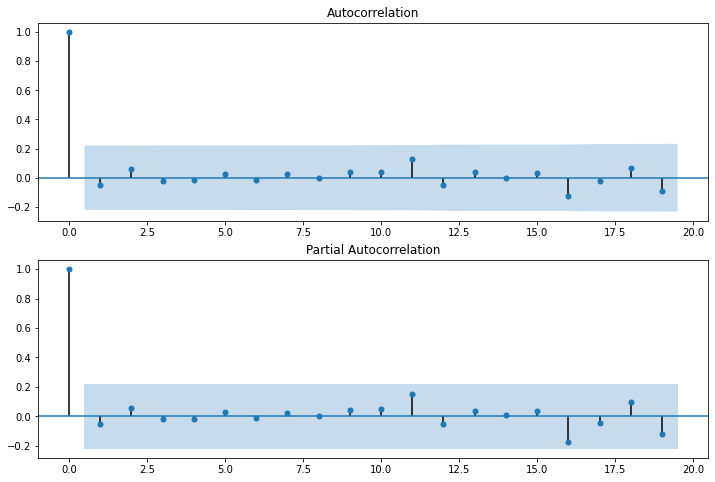

In [44]:
import scipy.stats as stats
import seaborn as sns # informative statistical graphics.
import statsmodels.api as sm #for ARIMA and SARIMAX
resid = sarimax_mod.resid #gives residual degree of freedom (mu, sigma, pvalue ... )

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarimax_mod.resid, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarimax_mod.resid, ax=ax2)

In [45]:
future_predict=sarimax_mod.forecast(steps=5)
future_predict=pd.DataFrame(future_predict)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [46]:
data_test

,ds,y,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,Baltic_Dry_Index,BCI_China,CLI_China,CLI_US,Copper_Global_USD,number_of_days_from_today
79,2020-01-02,0.893123,19753,9914,87.625000,71.050179,12715.55000,2113.237500,-0.6,535,94.50153,85.38329,99.23477,5687.75,409
80,2020-01-03,0.829167,19945,9072,88.659091,70.204870,11846.22727,1903.625000,-0.6,626,96.55129,92.34856,97.54372,5182.63,408
81,2020-01-04,0.789704,19824,7800,83.750000,64.620000,11804.00950,1903.367000,-7.1,635,98.21212,95.14948,92.28025,5057.97,407
82,2020-01-05,0.762035,19441,8908,91.333333,54.148308,12179.60526,1975.322632,1.0,504,99.01438,97.71723,93.95093,5239.83,406
83,2020-01-06,0.811477,18998,8979,103.340909,55.002760,12727.15227,2025.714545,1.3,1799,99.29423,98.10716,95.88245,5754.60,405


In [47]:
#next 6 month prediction
sarimax_mod.predict(3,180)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



3      0.790306
4      0.762912
5      0.740640
6      0.762103
7      0.744721
         ...   
176    2.979352
177    3.013326
178    3.047558
179    3.082046
180    3.116790
Length: 178, dtype: float64

In [48]:
future_predict['ds']=data_test.reset_index()['ds'].values
future_predict = future_predict.set_index('ds')
data_test = data_test.set_index('ds')

In [49]:
data_test.reset_index()['ds'].values

array([datetime.date(2020, 1, 2), datetime.date(2020, 1, 3),
       datetime.date(2020, 1, 4), datetime.date(2020, 1, 5),
       datetime.date(2020, 1, 6)], dtype=object)

In [50]:
print("MAPE Mean Absolute Percentage Error:", mean_absolute_percentage_error(data_test['y'], future_predict[0]))
print("Directional Symmetry Statistic:", directional_symmetry(data_test['y'], future_predict[0]))

MAPE Mean Absolute Percentage Error: 11.996464470656324
Directional Symmetry Statistic: 25.0


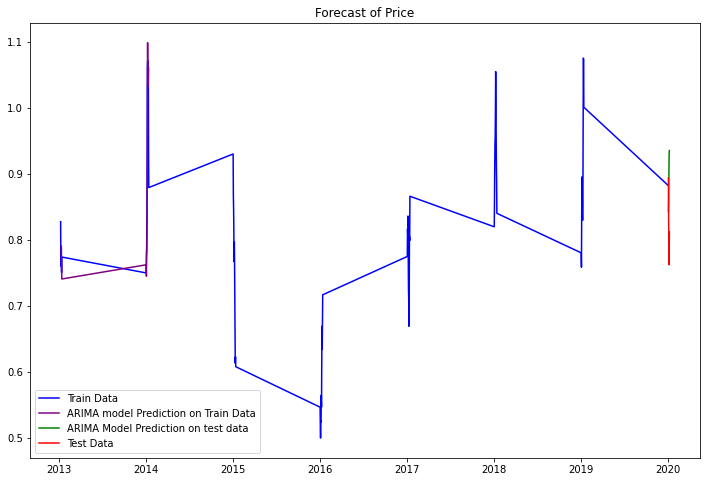

In [51]:
#6 month forcasting
figg = plt.figure(figsize=(12, 8))
orig = plt.plot(train_df[['y']], color='blue',label='Train Data')
pred_train=plt.plot(sarimax_mod.predict(3,16),color='purple',label='ARIMA model Prediction on Train Data')
fore = plt.plot(future_predict, color='green', label='ARIMA Model Prediction on test data')
fes = plt.plot(data_test[['y']], color='red', label='Test Data')
plt.legend(loc='best')
plt.title('Forecast of Price')
plt.show()

# Deep learning Model : LSTM

In [52]:
# Stacked LSTM for price forcasting with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back),1:]
		dataX.append(a)
		dataY.append(dataset[i + look_back,0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

In [53]:
X

,ds,y,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,Baltic_Dry_Index,BCI_China,CLI_China,CLI_US,Copper_Global_USD,number_of_days_from_today
0,2013-01-07,0.827352,20575,10568,127.191304,82.222360,13750.31522,1837.619565,-0.4,1062,98.80018,101.14230,100.62300,6906.64,2960
1,2013-01-08,0.760221,20609,10821,137.055000,82.221429,14308.26190,1896.392857,0.5,1132,99.04874,101.19380,100.65450,7186.25,2959
2,2013-01-09,0.784715,20761,10774,134.185714,83.295918,13801.39286,1846.880952,0.1,2003,99.27196,101.20660,100.66460,7159.27,2958
3,2013-01-10,0.769293,20735,11291,132.572727,85.443634,14117.65217,1884.836957,-0.1,1504,99.40488,101.18350,100.66660,7203.02,2957
4,2013-01-11,0.750242,20854,11559,136.323810,88.363265,13684.01190,1866.416667,2.1,1821,99.36221,101.12830,100.67440,7070.65,2956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020-01-02,0.893123,19753,9914,87.625000,71.050179,12715.55000,2113.237500,-0.6,535,94.50153,85.38329,99.23477,5687.75,409
80,2020-01-03,0.829167,19945,9072,88.659091,70.204870,11846.22727,1903.625000,-0.6,626,96.55129,92.34856,97.54372,5182.63,408
81,2020-01-04,0.789704,19824,7800,83.750000,64.620000,11804.00950,1903.367000,-7.1,635,98.21212,95.14948,92.28025,5057.97,407
82,2020-01-05,0.762035,19441,8908,91.333333,54.148308,12179.60526,1975.322632,1.0,504,99.01438,97.71723,93.95093,5239.83,406


In [54]:
dataset=X.copy()

In [55]:
dataset = dataset.set_index('ds')

In [56]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.drop(['y'],axis=1))
y=np.array(X['y'])
dataset=np.hstack((y.reshape(y.shape[0],1),dataset))
#split into train and test sets
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [57]:
# reshape into X=t and Y=t+1
look_back = 1
X_train, y_train= create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [58]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[2],1)
X_tr_t=X_train.copy()
X_tst_t=X_test.copy()

In [59]:
batch_size = 1
look_back=13
#model = Sequential()
#model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
#model.add(Dense(1))

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_tr_t.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(loss='mean_absolute_percentage_error', optimizer='adam')
model.fit(X_tr_t , y_train, epochs=1000, batch_size=batch_size, verbose=2, shuffle=False)

Epoch 1/1000
73/73 - 3s - loss: 16.6686
Epoch 2/1000
73/73 - 1s - loss: 11.1544
Epoch 3/1000
73/73 - 1s - loss: 16.3745
Epoch 4/1000
73/73 - 1s - loss: 15.9255
Epoch 5/1000
73/73 - 1s - loss: 14.8324
Epoch 6/1000
73/73 - 1s - loss: 13.5205
Epoch 7/1000
73/73 - 1s - loss: 14.8882
Epoch 8/1000
73/73 - 1s - loss: 16.9860
Epoch 9/1000
73/73 - 1s - loss: 16.0892
Epoch 10/1000
73/73 - 1s - loss: 16.2650
Epoch 11/1000
73/73 - 1s - loss: 16.0422
Epoch 12/1000
73/73 - 1s - loss: 15.4847
Epoch 13/1000
73/73 - 1s - loss: 15.5258
Epoch 14/1000
73/73 - 1s - loss: 15.6620
Epoch 15/1000
73/73 - 1s - loss: 15.3062
Epoch 16/1000
73/73 - 1s - loss: 14.8814
Epoch 17/1000
73/73 - 1s - loss: 14.9517
Epoch 18/1000
73/73 - 1s - loss: 14.4485
Epoch 19/1000
73/73 - 1s - loss: 14.3254
Epoch 20/1000
73/73 - 1s - loss: 13.4223
Epoch 21/1000
73/73 - 1s - loss: 14.2308
Epoch 22/1000
73/73 - 1s - loss: 11.9834
Epoch 23/1000
73/73 - 1s - loss: 13.2315
Epoch 24/1000
73/73 - 1s - loss: 11.7251
Epoch 25/1000
73/73 - 1s 

In [60]:


trainPredict = model.predict(X_tr_t, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_tst_t, batch_size=batch_size)


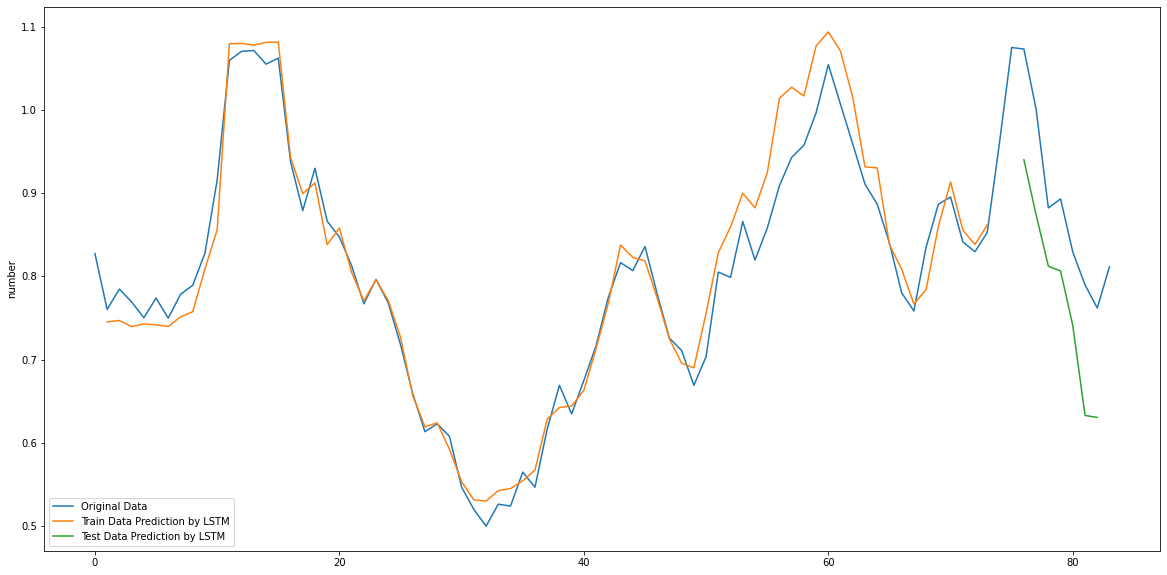

In [61]:
look_back=1
trainPredictPlot = np.empty_like(dataset[:,0] )
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict.reshape(trainPredict.shape[0])
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset[:,0] )
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset )-1] = testPredict.reshape(testPredict.shape[0])
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(dataset[:,0], label='Original Data')
plt.plot(trainPredictPlot, label='Train Data Prediction by LSTM')
plt.plot(testPredictPlot,label='Test Data Prediction by LSTM')
plt.ylabel('number')
plt.legend()
plt.show()

In [62]:
print("MAPE Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, testPredict.reshape(testPredict.shape[0])))
print("Directional Symmetry Statistic:", directional_symmetry(y_test, testPredict.reshape(testPredict.shape[0])))

MAPE Mean Absolute Percentage Error: 12.926832200564084
Directional Symmetry Statistic: 83.33333333333331


In [64]:
X

,ds,y,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,Baltic_Dry_Index,BCI_China,CLI_China,CLI_US,Copper_Global_USD,number_of_days_from_today
0,2013-01-07,0.827352,20575,10568,127.191304,82.222360,13750.31522,1837.619565,-0.4,1062,98.80018,101.14230,100.62300,6906.64,2960
1,2013-01-08,0.760221,20609,10821,137.055000,82.221429,14308.26190,1896.392857,0.5,1132,99.04874,101.19380,100.65450,7186.25,2959
2,2013-01-09,0.784715,20761,10774,134.185714,83.295918,13801.39286,1846.880952,0.1,2003,99.27196,101.20660,100.66460,7159.27,2958
3,2013-01-10,0.769293,20735,11291,132.572727,85.443634,14117.65217,1884.836957,-0.1,1504,99.40488,101.18350,100.66660,7203.02,2957
4,2013-01-11,0.750242,20854,11559,136.323810,88.363265,13684.01190,1866.416667,2.1,1821,99.36221,101.12830,100.67440,7070.65,2956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020-01-02,0.893123,19753,9914,87.625000,71.050179,12715.55000,2113.237500,-0.6,535,94.50153,85.38329,99.23477,5687.75,409
80,2020-01-03,0.829167,19945,9072,88.659091,70.204870,11846.22727,1903.625000,-0.6,626,96.55129,92.34856,97.54372,5182.63,408
81,2020-01-04,0.789704,19824,7800,83.750000,64.620000,11804.00950,1903.367000,-7.1,635,98.21212,95.14948,92.28025,5057.97,407
82,2020-01-05,0.762035,19441,8908,91.333333,54.148308,12179.60526,1975.322632,1.0,504,99.01438,97.71723,93.95093,5239.83,406


# Machine Learning Models: Xgboost, Random Forest, Linear Regression LASSO, Ridge regression

In [66]:

# Split the data into X & y
df_tmp=data.copy()
X = df_tmp.drop(columns=['Date','dd','mm','yyyy','StainlessSteelPrice']+columns_need_to_remove,axis=1)
y = df_tmp["StainlessSteelPrice"]
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_test,y_train,y_test=X[:78],X[78:],y[:78], y[78:]
print(X_train.shape)
X_test=np.array(X_test)
y_test=np.array(y_test)
col_index=X_test[:,-1].argsort()[::-1]
X_test=X_test[col_index]
y_test=y_test[col_index]
scaler = StandardScaler()
scaler.fit(X_train)
print('Feature,Mean, Variance:')
for i, j ,k in zip(every_column_except_y,scaler.mean_,scaler.var_):
  print(i,j,k)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print(len(X_train))
print(len(X_test))

#########################xgboost model with grid search to find hyperparameters######################
n_estimators = [10,20,30,40,50,60,70,80,100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]
learning_rate = [0.001,0.01,0.05, 0.1, 0.15, 0.20,1]
min_child_weight = [1, 2, 3, 4]
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
    }
mape=make_scorer(mean_absolute_percentage_error,greater_is_better=False)
regressor = xgboost.XGBRegressor()

random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=hyperparameter_grid, cv=5, 
                              n_iter=50, scoring = mape,n_jobs = 4, 
                              verbose = 5, return_train_score = True, random_state=42)
random_cv.fit(X_train,y_train)
print(random_cv.best_params_)
regressor = xgboost.XGBRegressor(base_score= 0.5,
 booster= 'gbtree',
 learning_rate= 0.2,
 max_depth= 5,
 min_child_weight=1,
 n_estimators= 80)
y_preds = regressor.fit(X_train,y_train).predict(X_test)
mae_rf = mean_absolute_percentage_error(y_test,y_preds)
ds= directional_symmetry(y_test, y_preds)
print('MAPE',mae_rf, 'DS',ds)
#############################Random Forest Regressor#####################
model = RandomForestRegressor(n_jobs=-1)
print(model)
model.fit(X_train,y_train)
# Evaluate model using mean absolute error
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae_rf = mean_absolute_percentage_error(y_test,y_preds)
ds= directional_symmetry(y_test, y_preds)
print('MAPE',mae_rf, 'DS',ds)

###########################linear Regression model##########################

model=LinearRegression().fit(X_train, y_train)
y_preds = model.predict(X_test)
mae_rf = mean_absolute_percentage_error(y_test,y_preds)
ds= directional_symmetry(y_test, y_preds)
print('MAPE',mae_rf, 'DS',ds)

(78, 13)
Feature,Mean, Variance:
Steel_Inventory_M_USD 20106.24358974359 3285945.158612755
Steel_Orders_M_USD 9885.141025641025 1552303.6852399735
IronOre_Global_USD 79.06360583807694 592.1812298678882
CoalAustralia_Global_USD 83.17662011166667 373.18185355984764
Nickel_Global_USD 12731.432463602567 7694755.987312424
Zinc_Global_USD 2382.852253205128 225549.51405673832
Freight_Transport_Index 0.20641025641025643 0.8931640368178833
Baltic_Dry_Index 1091.128205128205 185145.5476660092
BCI_China 98.82314756410256 0.35982123769278335
CLI_China 99.96203089743588 0.5995813608902194
CLI_US 100.07963346153846 0.4800161938662228
Copper_Global_USD  6078.979102564103 619322.7926056051
number_of_days_from_today 1780.576923076923 474628.5261341223
78
6
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 216 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    6.0s finished


[02:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'n_estimators': 70, 'min_child_weight': 2, 'max_depth': 15, 'learning_rate': 0.15, 'booster': 'gbtree', 'base_score': 0.25}
[02:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAPE 10.488548320169022 DS 60.0
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
MAPE 7.794590077106099 DS 60.0
MAPE 33.62484255590004 DS 100.0


In [67]:
!pip install autofeat

# Machine Learning Models: LASSO, Ridge Regression, Random forest with additional created features with the help of AutoFeat Library

In [68]:
def test_autofeat( feateng_steps=2,units=None):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    # run autofeat
    afreg = AutoFeatRegressor(verbose=1, feateng_steps=feateng_steps, units=units)
    # fit autofeat on less data, otherwise ridge reg model with xval will overfit on new features
    X_train_tr = afreg.fit_transform(X_train, y_train)
    X_test_tr = afreg.transform(X_test)
    print("autofeat new features:", len(afreg.new_feat_cols_))
    print("MAPE on training data:", mean_absolute_percentage_error(y_train, afreg.predict(X_train_tr)))
    print("MAPE on test data:", mean_absolute_percentage_error(y_test, afreg.predict(X_test_tr)))
    print("Directional Symmetry Statistic on test data:", directional_symmetry(y_test, afreg.predict(X_test_tr)))

    # train rreg on transformed train split incl cross-validation for parameter selection
    print("# Ridge Regression")
    rreg = Ridge()
    param_grid = {"alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1., 2.5, 5., 10., 25., 50., 100., 250., 500., 1000., 2500., 5000., 10000.]}
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        gsmodel = GridSearchCV(rreg, param_grid, scoring = mape, cv=5)
        gsmodel.fit(X_train_tr, y_train)
    print("best params:", gsmodel.best_params_)
    print("best score:", gsmodel.best_score_)
    print("MAPE on training data:", mean_absolute_percentage_error(y_train, gsmodel.predict(X_train_tr)))
    print("MAPE on test data:", mean_absolute_percentage_error(y_test, gsmodel.predict(X_test_tr)))
    print("Directional Symmetry Statistic on test data:", directional_symmetry(y_test,  gsmodel.predict(X_test_tr)))
    print('Lasso')
    lasso=Lasso()
    param_grid = {"alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1., 2.5, 5., 10., 25., 50., 100., 250., 500., 1000., 2500., 5000., 10000.]}
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        gsmodel = GridSearchCV(lasso, param_grid, scoring = mape, cv=5)
        gsmodel.fit(X_train_tr, y_train)
    print("best params:", gsmodel.best_params_)
    print("best score:", gsmodel.best_score_)
    print("MAPE on training data:", mean_absolute_percentage_error(y_train, gsmodel.predict(X_train_tr)))
    print("MAPE on test data:", mean_absolute_percentage_error(y_test, gsmodel.predict(X_test_tr)))
    print("Directional Symmetry Statistic on test data:", directional_symmetry(y_test,  gsmodel.predict(X_test_tr)))
    
    print("# Random Forest")
    rforest = RandomForestRegressor(n_estimators=100, random_state=13)
    param_grid = {"min_samples_leaf": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]}
    gsmodel = GridSearchCV(rforest, param_grid, scoring = mape, cv=5)
    gsmodel.fit(X_train_tr, y_train)
    print("best params:", gsmodel.best_params_)
    print("best score:", gsmodel.best_score_)
    print("MAPE on training data:", mean_absolute_percentage_error(y_train, gsmodel.predict(X_train_tr)))
    print("MAPE on test data:", mean_absolute_percentage_error(y_test, gsmodel.predict(X_test_tr)))
    print("Directional Symmetry Statistic on test data:", directional_symmetry(y_test,  gsmodel.predict(X_test_tr)))
for i in range(1):
  print('##################feateng_steps=',i+1,' ######################################')
  test_autofeat( feateng_steps=i+1)

##################feateng_steps= 1  ######################################
[AutoFeat] The 1 step feature engineering process could generate up to 91 features.
[AutoFeat] With 78 data points this new feature matrix would use about 0.00 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 65 transformed features from 13 original features - done.
[feateng] Generated altogether 65 new features in 1 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 64 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 16 features after 5 feature selection runs
[featsel] 15 features after correlation filtering
[featsel] 7 features after noise filtering
[AutoFeat] Computing 3 new features.
[AutoFeat]     3/    3 new featu

<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



[feateng] Generated 51000 transformed features from 11960 original features - done.
[feateng] Generated altogether 63095 new features in 3 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 48162 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 42 features after 5 feature selection runs
[featsel] 35 features after correlation filtering
[featsel] 15 features after noise filtering
[AutoFeat] Computing 15 new features.
[AutoFeat]    15/   15 new features ...done.
[AutoFeat] Final dataframe with 28 feature columns (15 new).
[AutoFeat] Training final regression model.
[AutoFeat] Trained model: largest coefficients:
0.740203172867836
0.021719 * x004*Abs(x003)
0.021290 * Abs(x012**2 - exp(x010))
0.015285 * x004*x010**2
-0.013924 * Abs(x0

<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



<string>:2: RuntimeWarning:

divide by zero encountered in log

<string>:2: RuntimeWarning:

divide by zero encountered in log



[feateng] Generated 51000 transformed features from 11960 original features - done.
[feateng] Step 4: combining old and new features


KeyboardInterrupt: ignored

# Neural Network Model with Pytorch

0 46.13474655151367
1 38.7170295715332
2 32.116214752197266
3 26.284027099609375
4 21.168235778808594
5 16.717897415161133
6 12.938552856445312
7 9.84252643585205
8 7.42533016204834
9 5.684387683868408
10 4.588488578796387
11 4.056254863739014
12 3.9528818130493164
13 4.109633922576904
14 4.351409912109375
15 4.523345470428467
16 4.523411273956299
17 4.325128078460693
18 3.957186222076416
19 3.478966236114502
20 2.958502769470215
21 2.4665677547454834
22 2.0495247840881348
23 1.7325681447982788
24 1.5196270942687988
25 1.4027447700500488
26 1.3607028722763062
27 1.369882345199585
28 1.4049620628356934
29 1.4444235563278198
30 1.4713078737258911
31 1.4744250774383545
32 1.4478845596313477
33 1.3912551403045654
34 1.3088860511779785
35 1.2080076932907104
36 1.0986831188201904
37 0.9906559586524963
38 0.8929235935211182
39 0.812466025352478
40 0.7538750767707825
41 0.7175580263137817
42 0.7002329230308533
43 0.6959221959114075
44 0.697254478931427
45 0.6969152092933655
46 0.68917977809906

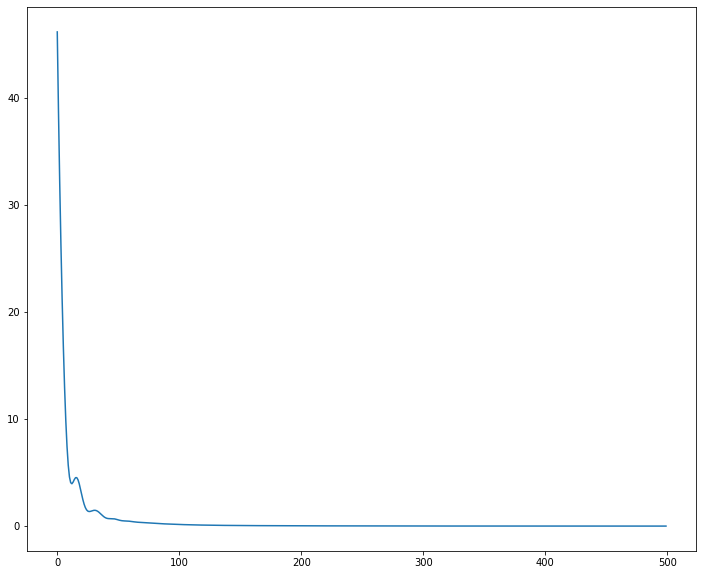

MAPE on test data: 167.7883609836618
Directional Symmetry Statistic on test data: 80.0


In [69]:
X_train = torch.from_numpy(np.array(X_train)).float()
y_train = torch.from_numpy(np.array(y_train)).float()
X_test = torch.from_numpy(np.array(X_test)).float()
y_train=y_train.reshape(y_train.shape[0],1)
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net, self).__init__()
        
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)
        
    def forward(self, x):
        y_pred = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(y_pred).clamp(min=0)
        y_pred = self.linear3(y_pred).clamp(min=0)
        y_pred = self.linear4(y_pred)
        return y_pred
H1, H2, H3 = 500, 1000, 200
D_in, D_out = X_train.shape[1], y_train.shape[1]
model1 = Net(D_in, H1, H2, H3, D_out)
criterion = nn.MSELoss(reduction='sum')
#optimizer = torch.optim.SGD(model1.parameters(), lr=1e-4 * 2)
optimizer = torch.optim.Adam(model1.parameters(), lr=1e-4 )
losses1 = []

for t in range(500):
    y_pred = model1(X_train)
    
    loss = criterion(y_train, y_pred)
    print(t, loss.item())
    losses1.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses1)), losses1)
#plt.plot(range(len(losses3)), losses3)
plt.show()
y_pred = model1(X_test)
#print("MAPE on training data:", mean_absolute_percentage_error(y_train, 
print("MAPE on test data:", mean_absolute_percentage_error(y_test, y_pred.detach().numpy().reshape(y_pred.detach().numpy().shape[0])))
print("Directional Symmetry Statistic on test data:", directional_symmetry(y_test, y_pred.detach().numpy().reshape(y_pred.detach().numpy().shape[0])))
